# Data Mining Midterm Project
### Why We Chose This Dataset:
This data set is extremely robust with information that is thought to be linked to health and nutrition. There are extensive subsets such as demographics, diet, exams, labs, and more that can be analyzed to find correlations that contribute positively or negatively to overall health. There are a lot of questions that can be answered with this data set; we will try to focus on a few we think are interesting to us
### Business Questions:
1. Can we identify habits/factors that positively or negatively affect health?
2. Is there a correlation between income level and overall health?
3. Can we identify the main diseases that affect certain demographics?
4. Does the presence of one disease increase the likelihood of the presence of another diease within an individual?
### Project Outline:
1. **Software Engineering** - Will build functions such as `dataLoader(), logger(), featurize(), cluster(),` and `dimRed()` to streamline data transformations within the dataframe(s).
2. **Data Engineering** - Will clean, organize, and transform the data for ease of use during the research and analysis portion of the project. Featurization. 
3. **Business Analysis** - Discover initial challenge questions for the dataset(s). Then evolve the questions as we iterate through the project. 
4. **Research** - After featurization, extract metadata on the full dataset and run clustering/dimentions reduction on various slices of the data. Metadata will be added to each cluster. Each iteration may vary on addition/deletion of features as we attempts to gain a conclusion on our business questions. 
### Resources:
- https://www.kaggle.com/code/gopalkholade/diabetes-prediction

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re

# this is used for predictions 
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# data 
df1 = pd.read_csv('../nhnes/labs.csv')
df2 = pd.read_csv('../nhnes/examination.csv')
df3 = pd.read_csv('../nhnes/demographic.csv')
df4 = pd.read_csv('../nhnes/diet.csv')
df5 = pd.read_csv('../nhnes/questionnaire.csv')

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

# add necessary data into one set 
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#sel.fit_transform(df)

df.describe()


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [3]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

# rename columns
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan = american 
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin', # used to verify diabetic or not 
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [4]:
from sklearn.feature_selection import VarianceThreshold

#year in us -> american : 0, not american : 1
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

#YEARS IN US 
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())


#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breat_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df)

#for dataset in df:
#    dataset['GlycoHemoglobin'] = dataset['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())

#df.head(12)


df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [5]:
# Using GlycoHemoglobin we can create a Diabetes column that determines if someone is diabetec = 2, 
# pre-diabetic = 1, or not diabetic = 0
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head(10)

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0
5,73562,1,0.0,4.79,5.5,41.8,29.1,53.1,2.0,0.0
6,73563,1,0.0,5.00,5.4,14.9,20.7,60.3,1.0,0.0
7,73564,2,0.0,5.00,5.5,38.0,26.7,45.9,2.0,0.0
8,73566,1,0.0,5.00,5.4,29.0,19.9,38.8,2.0,0.0
9,73567,2,0.0,0.48,5.2,27.5,20.0,43.5,2.0,0.0


<AxesSubplot:>

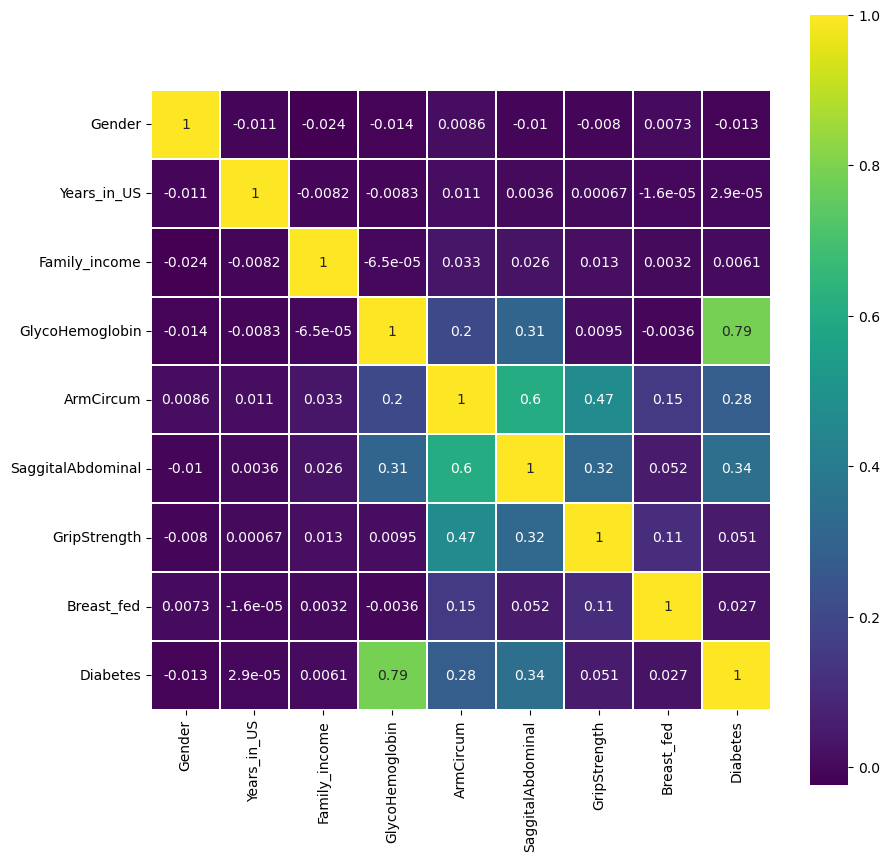

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)
# plot a heatmap should show that glycohemoglobin is a good sign of determining diabetes 

In [9]:
# import linear model from sklearn this will be our first prediction method 
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score

# drop glycohemoglobin from dataset
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)

df.head(5)

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


In [18]:
# Our first prediction test will use linear regression 
# Set target set to diabetes column and data to every other column 
# data = attributes, target = diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

# Create 4 data sets to train and test data for predictions 
# Seperate training set and test set
# X holds columns every column except for diabetes 
train_X = data[:6000]
test_X = data[6000:]

# Y holds diabetic or not
train_Y = target[:6000]
test_Y = target[6000:]

#create linear regression obj
lr_regr = linear_model.LinearRegression()

# the .fit() helps learn from the data 
# training via linear regression model
lr_regr.fit(train_X, train_Y)

# make prediction using the test set
lr_pred_diabetes = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

# Print results 
print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(test_Y, lr_pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_diabetes))

# Score == prediction accuracy 
print('Score: %.2f' % lr_regr.score(test_X, test_Y))

LRr_Coefficients:  [[ 1.98953563e-06 -2.46852260e-02 -9.10149905e-04 -5.26378493e-03
   1.12229802e-02  3.57806364e-02 -3.02433944e-03  1.73096160e-03]]
LR_Mean Square Error: 0.23
LR_Variance score: 0.12
Score: 0.12


In [26]:
# Our next prediction test will use AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(train_X, train_Y)
print("training....\n")

#make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_diabetes)

print('\nparms: \n', ab_clf.get_params)

# Score = prediction accuracy 
ab_clf_score = ab_clf.score(test_X, test_Y)
print("Prediction Accuracy for AdaBoost: %.2f" % ab_clf.score(test_X, test_Y))

training....

prediction: 
 [0. 0. 0. ... 0. 0. 0.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>
Prediction Accuracy for AdaBoost: 0.72


In [25]:
# Next prediction tests 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

# Train via bagging model 
bagging.fit(train_X, train_Y)

# predict using test_X
bg_pred_diabetes = bagging.predict(test_X)

# Score = Accuracy 
bg_dt_score = bagging.score(test_X, test_Y)
print("Prediction Accuracy for baggingClassifier = ", bagging.score(test_X, test_Y))

Prediction Accuracy for baggingClassifier =  0.8670338316286389


In [27]:
# Next prediction for BaggingsKNeighbors
bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

# Train data 
bagging.fit(train_X, train_Y)

# Predict 
bg_pred_diabetes = bagging.predict(test_X)

# Accuracy 
bg_score = bagging.score(test_X, test_Y)
print("Prediction Accuracy for KNeighbor = ",bagging.score(test_X, test_Y))

Prediction Accuracy for KNeighbor =  0.8806713873590348


In [28]:
# Last prediction test case 
from sklearn.neural_network import MLPClassifier

# create MLP model 
mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

# Train data 
mlp.fit(train_X, train_Y)

# Make prediction 
mlp_pred_diabetes = mlp.predict(test_X)

# Print params
print("parameter: ", mlp.get_params())

# Accuracy 
mlp_score = mlp.score(test_X, test_Y)
print("MLP Accuracy = ",mlp.score(test_X, test_Y))

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
MLP Accuracy =  0.8806713873590348


In [29]:
# Make a dataset with all test cases and their respective accuracy scores 
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'MLP'],
     'accuracy' : [lr_score, ab_clf_score, bg_dt_score, bg_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df

,Model,accuracy
0,Linear Regression,0.120948
1,Adaboost,0.716234
2,Bagging_decision tree based,0.867034
3,Bagging_KNeighbors,0.880671
4,MLP,0.880671


<AxesSubplot:title={'center':'Diabetes Prediction Accuracy'}, xlabel='Model'>

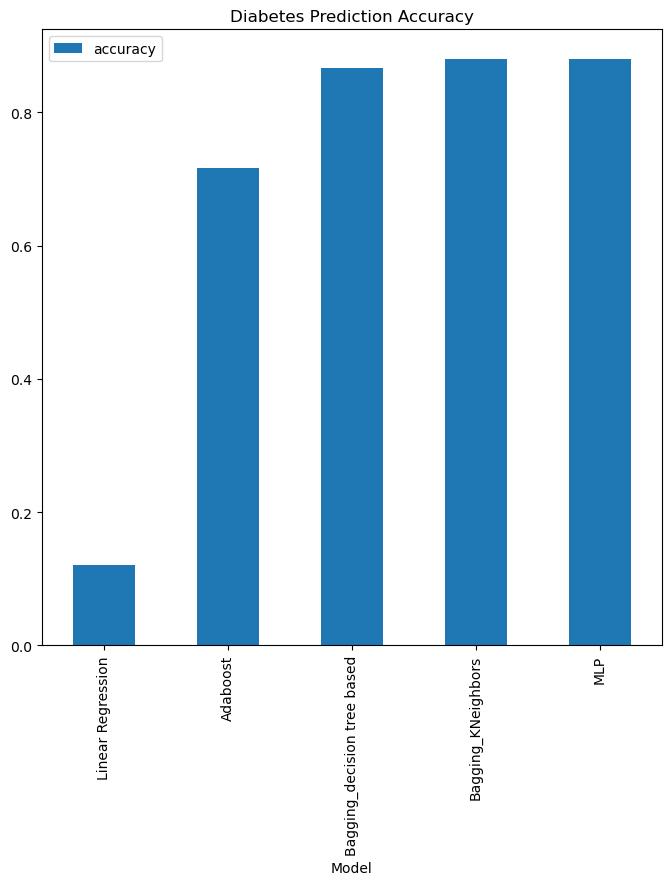

In [30]:
result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title='Diabetes Prediction Accuracy', 
               sort_columns=True)

Based on the data and observations, we can conclude that all of our test cases, except for LinearRegression, achieved an accuracy rate above 75% in predicting diabetes within this dataset. Therefore, we can confidently assert that the prediction methods offered by sklearn are reliable. 